# 泰坦尼克号幸存者的预测

## 准备
首先导入需要使用的包

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("titanic-data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 筛选特征值
## 针对缺失严重的数据，需要删除掉，eg、Cabin
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

## 上述语句等同于
#data = data.drop(['Cabin','Name','Ticket'],inplace=False,axis=1)

In [14]:
# 处理年龄缺失值的问题--缺失的年龄可以使用平均值来填补
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [17]:
# 处理Embarked数据，因为缺失值只有2条，缺失数据量很少，可以直接把这2条记录删除掉
# axis = 0是删除行，axis=1 是删除列
data = data.dropna(axis=0)

In [20]:
# 处理数据，把非数字属性处理成数字
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

<ipython-input-20-019cd6e7e1c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))


In [24]:
data['Sex'] = (data['Sex'] == 'male').astype('int')

<ipython-input-24-bac81ac584dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex'] == 'male').astype('int')


In [25]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


## 划分训练集和测试集

In [31]:
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

#划分训练集和测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

#调整数据集的索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [41]:
# 实例化
clf = DecisionTreeClassifier(random_state=15)
# 训练模型
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
print(score)

0.7453183520599251


## 交叉验证

In [42]:
from sklearn.model_selection import cross_val_score

# 实例化
clf = DecisionTreeClassifier(random_state=15)
score = cross_val_score(clf,x,y,cv=10).mean()
print(score)

0.7413559754851888


## 调整参数，画学习曲线

0.8143896833503576


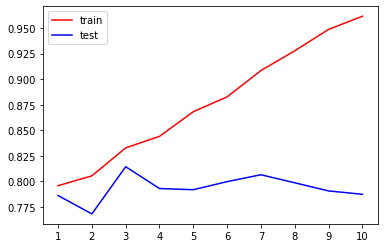

In [43]:
train_score_list = []
test_score_list = []

# 训练10次看最大深度的影响
for i in range(10):
    clf = DecisionTreeClassifier(random_state=15
                                ,max_depth = i+1)
    clf = clf.fit(Xtrain,Ytrain)
    train_score = clf.score(Xtrain,Ytrain)
    test_score = cross_val_score(clf,x,y,cv=10).mean()
    train_score_list.append(train_score)
    test_score_list.append(test_score)
print(max(test_score_list))

# 画图
plt.plot(range(1,11),train_score_list,color='red',label = 'train')
plt.plot(range(1,11),test_score_list,color='blue',label = 'test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

0.8166624106230849


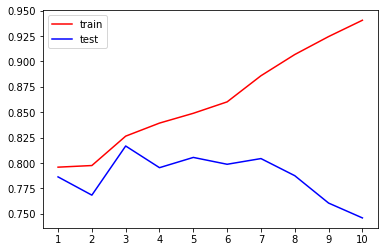

In [44]:
# 结合上图可以看到，随着max_depth的增加，当max_depth从3开始，训练集的结果明显好于测试集，出现过拟合的现象
# 当max_depth=3有轻微过拟合的表现,可以尝试使用criterion参数

train_score_list = []
test_score_list = []

# 训练10次看最大深度的影响
for i in range(10):
    clf = DecisionTreeClassifier(random_state=15
                                ,max_depth = i+1
                                ,criterion='entropy')
    clf = clf.fit(Xtrain,Ytrain)
    train_score = clf.score(Xtrain,Ytrain)
    test_score = cross_val_score(clf,x,y,cv=10).mean()
    train_score_list.append(train_score)
    test_score_list.append(test_score)
print(max(test_score_list))

# 画图
plt.plot(range(1,11),train_score_list,color='red',label = 'train')
plt.plot(range(1,11),test_score_list,color='blue',label = 'test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

## 网格搜索

网格搜索是一种可以同时调整多种参数的技术

In [45]:
import numpy as np

gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
            ,'criterion':("gini","entropy")
            ,"max_depth":[*range(1,10)]
            ,'min_samples_leaf':[*range(1,50,5)]
            ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
            }
clf = DecisionTreeClassifier(random_state=15)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

0.8231182795698924

In [46]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [47]:
GS.best_score_

0.8231182795698924

In [54]:
# 具体看一下

from sklearn.model_selection import cross_val_score

# 实例化
clf = DecisionTreeClassifier(random_state=15
                            ,max_depth=3
                            ,criterion='gini'
                            ,min_samples_leaf=6
                            ,splitter='best')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
print(score)

0.7940074906367042
